# Intro

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

1. Single-image, 
2. Multi-class classification problem
3. More than 40 classes
4. More than 50,000 images in total
5. Large, lifelike database

### Labels Overview

In [1]:
import pandas as pd
pd.read_csv('../input/traffic-signs-classification/labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


#   

# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# Data Collection

In [3]:
dir_path = '../input/gtsrb-german-traffic-sign'

In [4]:
os.listdir(dir_path)

['Test',
 'meta',
 'Train',
 'Test.csv',
 'Train.csv',
 'Meta',
 'test',
 'train',
 'Meta.csv']

In [5]:
#Assigning the path for train and test images

train_path = dir_path +'/Train'
test_path = dir_path + '/Test'

In [6]:
print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [7]:
sorted(os.listdir(test_path))

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

##   

# Visualization

#### Visualizing 25 random sample images from test set

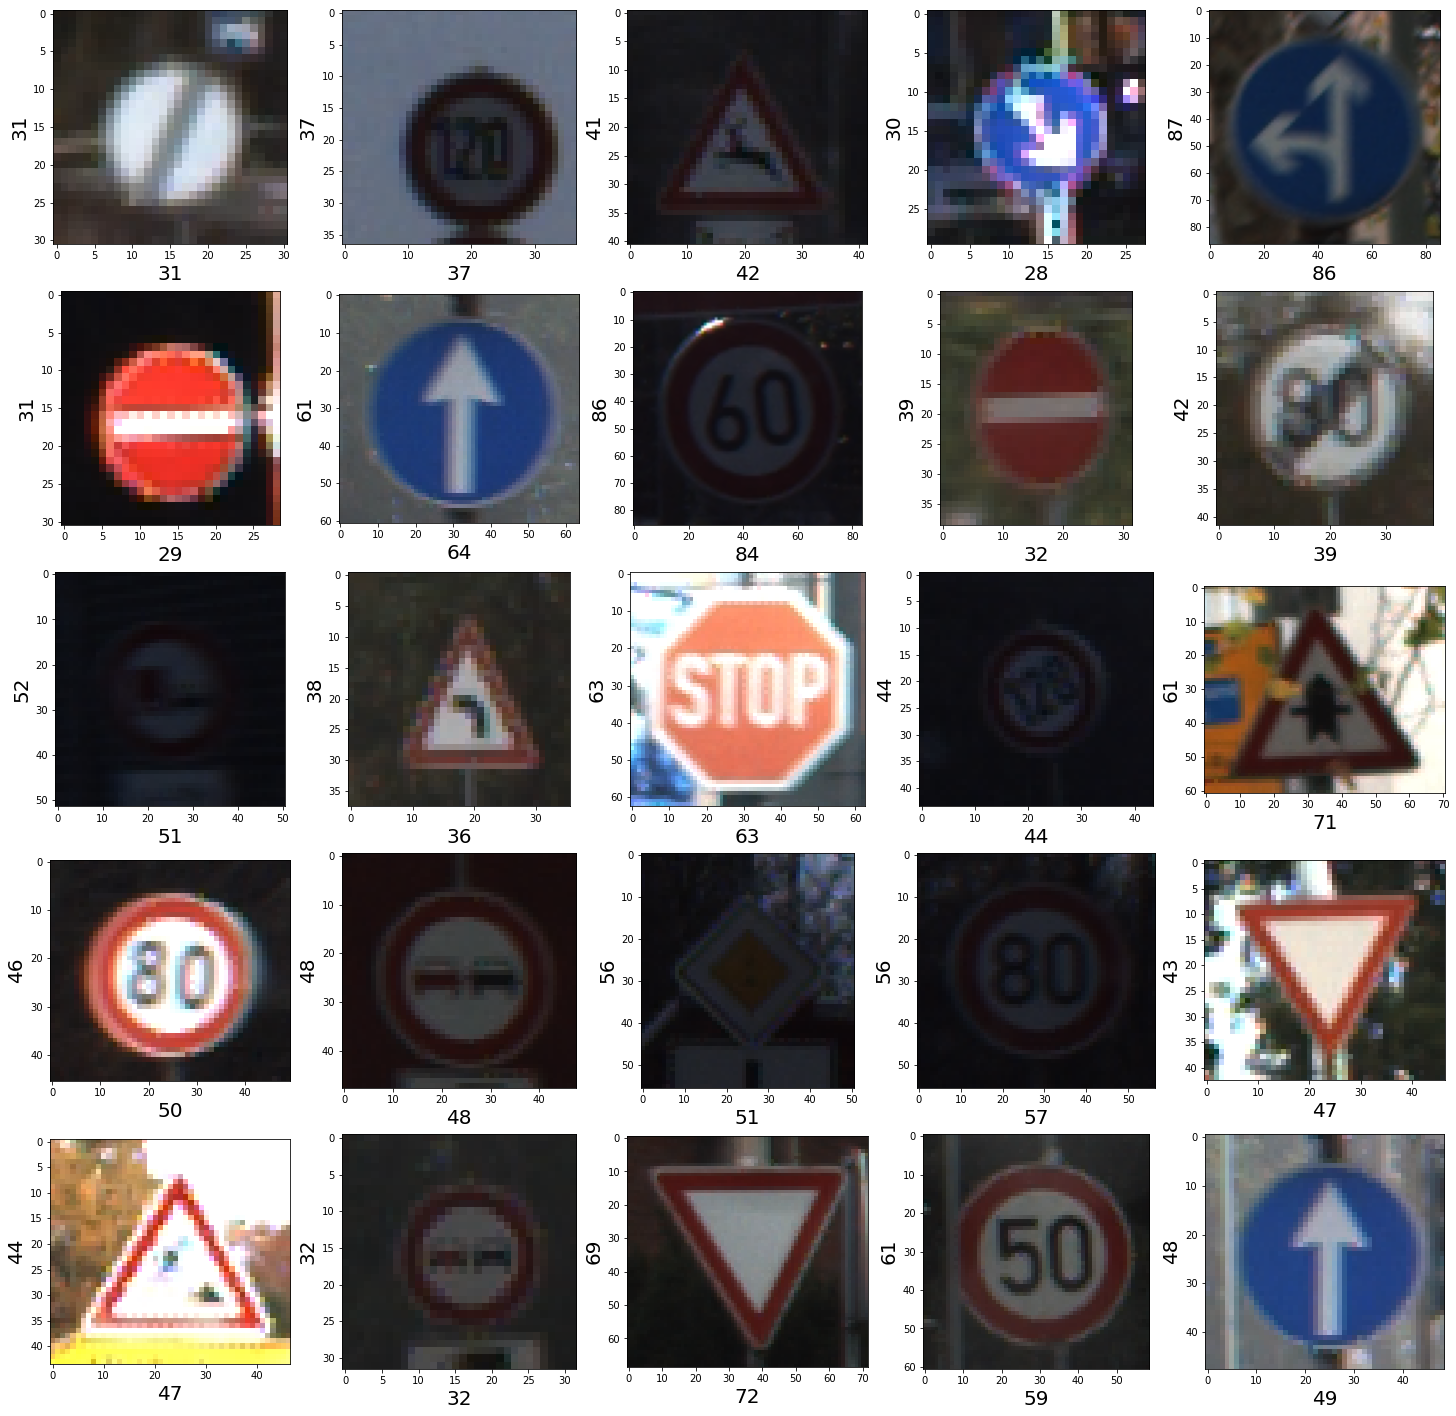

In [8]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


The dimensions of the images are not fixed. 

#### Note:
Convolutional neural networks cannot perform on images that have various dimensions.
We will resize these images during our model building.


But first find the mean of the dimensions of all the images in training set.

In [9]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

#### Exploring the dimensions with a jointplot

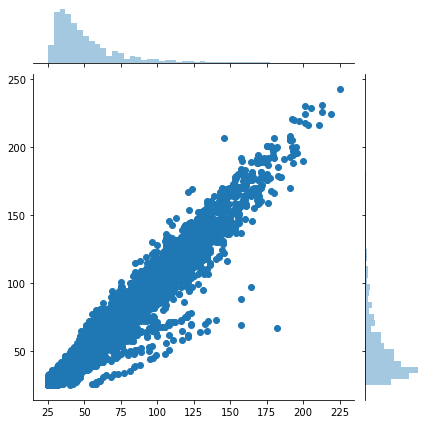

In [10]:
sns.jointplot(dim1,dim2)
plt.show()

In [11]:
np.mean(dim1)

50.328929582493814

In [12]:
np.mean(dim2)

50.83587951745773

Since the mean of both dimensions is around 50 , we will use (50x50) as the shape of images.

In [13]:
image_shape = (50,50)

#  

## Data Preprocessing

#### Importing the images

In [14]:
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

#### Scaling the images so that the values remain between 0 and 1

In [15]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [17]:
images.shape

(39209, 50, 50, 3)

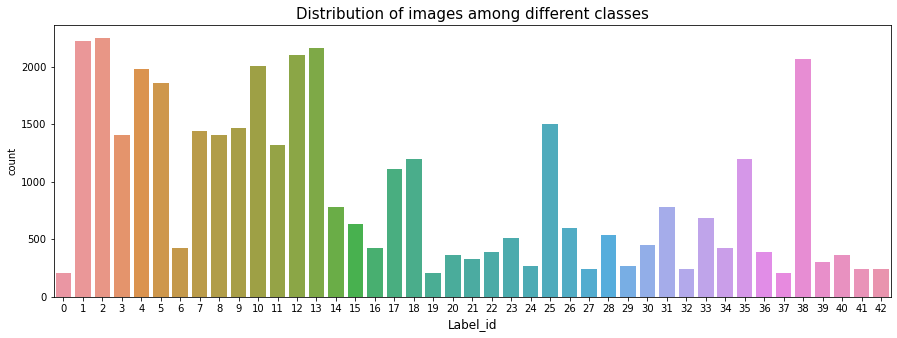

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

In [19]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

## Splitting the train data into train and validation data

In [20]:
import numpy as np
import pandas as pd

In [21]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [22]:
#Splitting the data
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

#### Changing target labels to categorical  using one-hot encoding technique

In [23]:
#keras has a built-in function for one-hot encoding.
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)

#    

## Model Building

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [25]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2

)

Epoch 1/25
491/491 - 4s - loss: 2.5648 - accuracy: 0.2732 - val_loss: 1.6342 - val_accuracy: 0.5431
Epoch 2/25
491/491 - 3s - loss: 1.4864 - accuracy: 0.5170 - val_loss: 0.8976 - val_accuracy: 0.7538
Epoch 3/25
491/491 - 3s - loss: 0.9777 - accuracy: 0.6747 - val_loss: 0.4322 - val_accuracy: 0.9017
Epoch 4/25
491/491 - 3s - loss: 0.6718 - accuracy: 0.7737 - val_loss: 0.2494 - val_accuracy: 0.9489
Epoch 5/25
491/491 - 4s - loss: 0.5126 - accuracy: 0.8301 - val_loss: 0.1548 - val_accuracy: 0.9697
Epoch 6/25
491/491 - 3s - loss: 0.4289 - accuracy: 0.8586 - val_loss: 0.1131 - val_accuracy: 0.9767
Epoch 7/25
491/491 - 3s - loss: 0.3644 - accuracy: 0.8819 - val_loss: 0.0934 - val_accuracy: 0.9824
Epoch 8/25
491/491 - 3s - loss: 0.3270 - accuracy: 0.8957 - val_loss: 0.0854 - val_accuracy: 0.9829
Epoch 9/25
491/491 - 3s - loss: 0.2980 - accuracy: 0.9035 - val_loss: 0.0593 - val_accuracy: 0.9864
Epoch 10/25
491/491 - 3s - loss: 0.2750 - accuracy: 0.9105 - val_loss: 0.0586 - val_accuracy: 0.9885

#### Achieved highest accuracy of 99.50% on validation data

In [29]:
#Saving the model
model.save('Model.h5')

## Model Evaluation


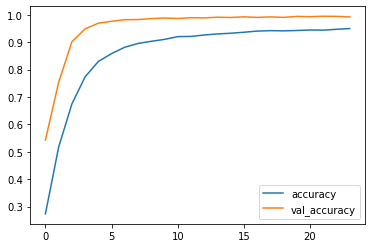

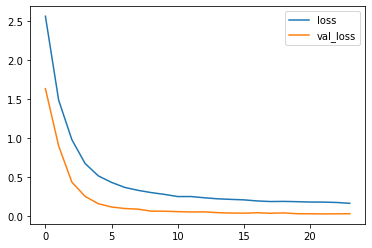

In [30]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

####   

## Testing on test data

In [31]:
from tensorflow.keras.models import load_model
model = load_model('Model.h5')

#### Note: The test images folder in the original dataset has a blank csv file which cannot be opened with the above function. So i copied that folder and deleted that csv file and uploaded the test images again seperately. These test images are same as the test images in the original dataset

In [38]:
test_path = '../input/test-images/Test'
test_img = sorted(os.listdir(test_path))

##### For some unknown reason , the images in kaggle kernel is not showing in the order they are in the Test folder. Upon inspection it is seen that the images are in sorted order. So using sorted() function to sort them.

In [33]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

**The above function can be used to scale any new traffic-sign images that can be predicted with our model. This is a general purpose function for code reusability.**

In [34]:
test_images = scaling(test_img,test_path)

#### Test labels

In [35]:
test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

y_test = test['ClassId'].values

y_test

array([16,  1, 38, ...,  6,  7, 10])

## Testing on test images

In [36]:
y_pred = model.predict_classes(test_images)

y_pred

array([16,  1, 38, ...,  6,  7, 10])

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.96      0.97       450
           4       0.98      0.99      0.99       660
           5       0.96      0.98      0.97       630
           6       1.00      0.93      0.96       150
           7       0.99      0.96      0.97       450
           8       0.95      0.98      0.97       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.94      1.00      0.97       420
          12       0.99      0.90      0.94       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.86      1.00      0.93       210
          16       1.00      0.99      1.00       150
          17       1.00    

#### We achieved an overall accuracy of 97% on our model. This is pretty good and we can use this model for predicting some other Traffic signs as well in future.